In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('X.csv')

y = pd.read_csv('y.csv')

X_TEST = pd.read_csv('X_TEST.csv')


# Coorelation with target

In [3]:
X_TEST.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [4]:
df = pd.concat([X,y],axis=1)

In [5]:
# correlation heatmap
corrmat = df.corr()

high_corr_feature = corrmat.index[abs(corrmat["SalePrice"]) >= 0.2]
high_corr_feature

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'RL', 'RM', 'Reg', 'NoRidge', 'NridgHt',
       'StoneBr', '2Story', 'New', 'WD', 'Partial', 'CBlock', 'PConc', 'No',
       'GLQ', 'Gable', 'Hip', 'VinylSd', 'None', 'Y', 'SBrkr', 'Attchd',
       'BuiltIn', 'Detchd', 'SalePrice'],
      dtype='object')

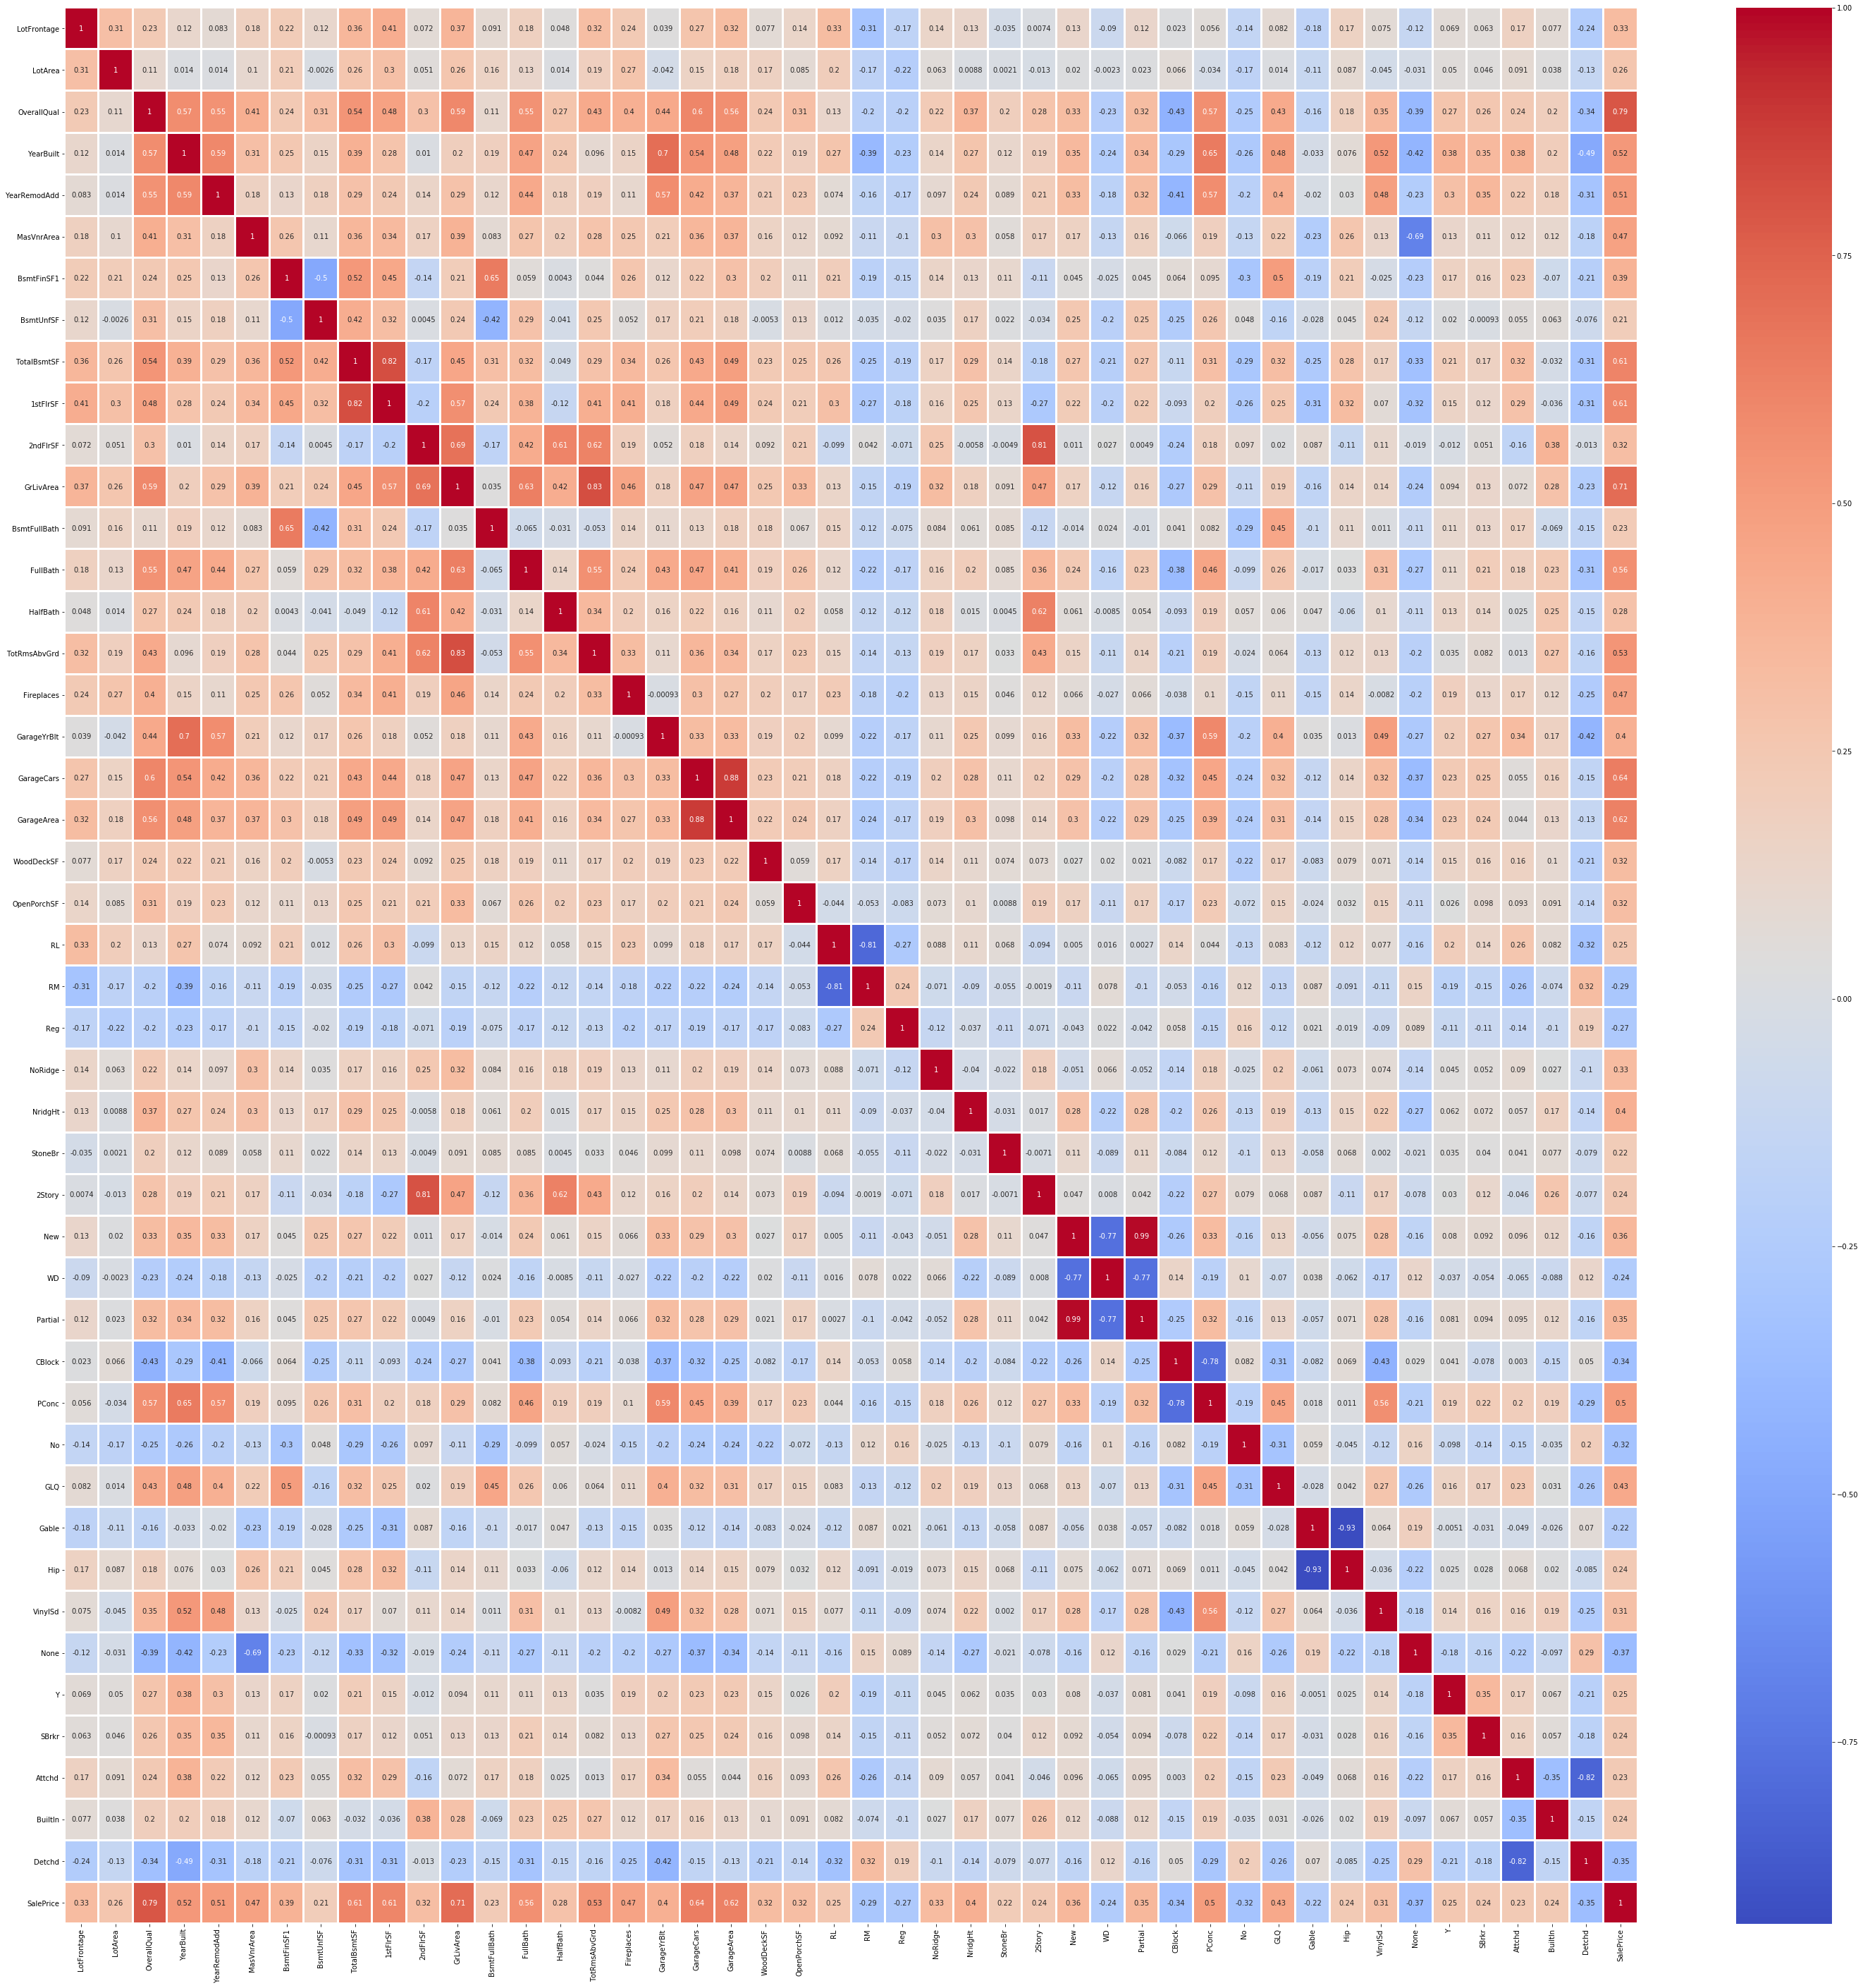

In [6]:
df_modif = df[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'RL', 'RM', 'Reg', 'NoRidge', 'NridgHt',
       'StoneBr', '2Story', 'New', 'WD', 'Partial', 'CBlock', 'PConc', 'No',
       'GLQ', 'Gable', 'Hip', 'VinylSd', 'None', 'Y', 'SBrkr', 'Attchd',
       'BuiltIn', 'Detchd', 'SalePrice']]
# correlation heatmap
plt.figure(figsize=(50,50))
ax = sns.heatmap(df_modif.corr(), cmap = "coolwarm", annot=True, linewidth=2)


# Model Building

# XG BOOST

In [8]:
X_df = df_modif.iloc[:,:-1]
y=df_modif.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model=xgb.XGBRegressor()
Grid_search = GridSearchCV(xgb_model,
                   {'max_depth': [ 2, 3, 4, 5, 10],
                    'n_estimators': [100, 500, 900, 1100, 1500]}, verbose=1)

# Fitting the model
Grid_search.fit(X_train,y_train)

print(Grid_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.6min finished


{'max_depth': 4, 'n_estimators': 900}


In [11]:
regressor=xgb.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')
regressor.fit(X_train,y_train)

[18:19:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, mon_child_weight=2,
             monotone_constraints='()', n_estimators=899, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

(0, 700000)

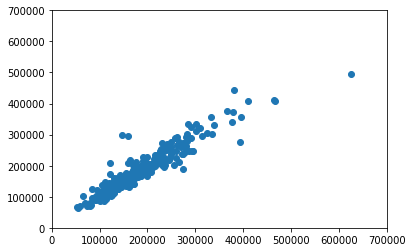

In [12]:
prediction=regressor.predict(X_test)

plt.scatter(y_test,prediction)
axes = plt.gca()
axes.set_xlim([0,700000])
axes.set_ylim([0,700000])

In [13]:
from sklearn import metrics
print('MSE:', metrics.mean_absolute_error(y_test, prediction))

MSE: 17215.627742401542


In [14]:
y_pred=regressor.predict(X_TEST)
y_pred=pd.DataFrame(data=y_pred)


sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],y_pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_corr.csv',index=False)